# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [25]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [26]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

To implement linear regression, we first add an extra term to out dependent variables, which is the bias term since it is not part of the initial dataset. The loss function chosen is $$(Y_{independent variable}-WX)^2$$ where W is the weights which get updated with each epoch using the derivative of the loss function. The learning rate contibutes the magnitude to which the previous epoch weights contribute to the upcoming epoch. The total number of epochs chosen was `1500`

In [27]:
# 1.3.1.2
# implement Linear Regression
x_train = np.array(x_train)

x_test = np.array(x_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

#adding a column for bias or intercept
X_train = np.insert(x_train, x_train.shape[1], 1, axis=1)

X_test = np.insert(x_test, x_test.shape[1], 1, axis=1)

In [28]:
# implement Linear Regression
import matplotlib.pyplot as plt
lossvals = []
def model_run(X,y,weights,learn_rate):
    d_loss_value = 0
    loss_value = 0
    for index,i in enumerate(X):
        loss_value += ((y[index]-np.dot(weights,i)) ** 2)
        d_loss_value -=  2*(y[index]-np.dot(weights,i))*i
    
    loss_value = loss_value / len(X)
    
    d_loss_value = d_loss_value / len(X)
    
    lossvals.append(loss_value)
    #print(loss,"loss")
    return W - (learn_rate*d_loss_value)


Learning Rate = 0.1 	 MSE = 0.0009626724354706032
Learning Rate = 0.01 	 MSE = 0.022430019925309696
Learning Rate = 0.001 	 MSE = 1.3129696183507689
Learning Rate = 0.0001 	 MSE = 4.826732863865882
Learning Rate = 1e-05 	 MSE = 5.995447377791531


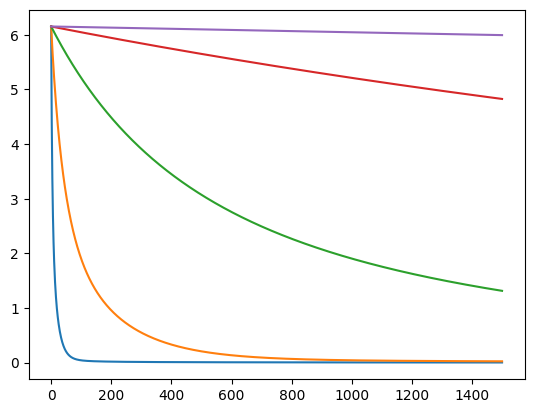

In [29]:
# 1.3.2.3
# try with different learning rates and choose the best one
for lr in [0.1,0.01,0.001,0.0001,0.00001]:
    lossvals = []
    W = np.zeros(X_train.shape[1])
    for i in range(0,1500):
        W = model_run(X_train,y_train,W,lr)
    print("Learning Rate = {} \t MSE = {}".format(lr,lossvals[-1]))
    plt.plot(lossvals)

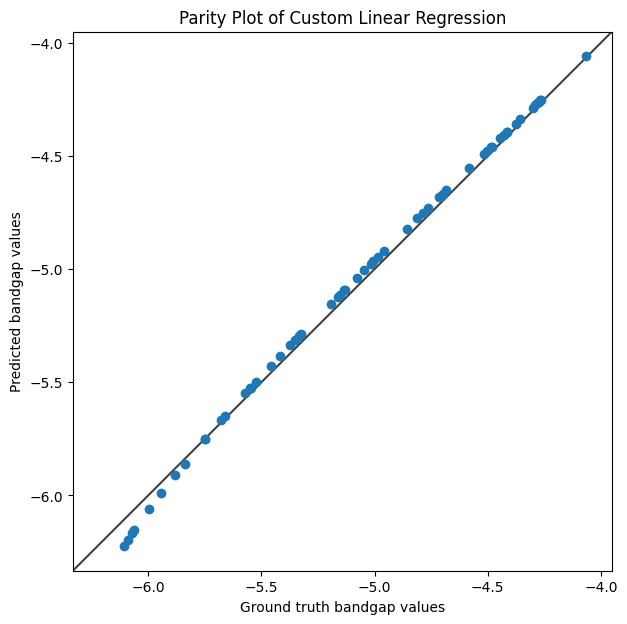

In [30]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

# Plotting for learning rate = 0.1

W = np.zeros(X_train.shape[1])
for i in range(0,1500):
    W = model_run(X_train,y_train,W,0.1)

y_pred = []
for point in X_test:
    y_pred.append(np.dot(np.array(point),W))

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()



### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`
- Ridge regression is a method that avoid overfitting in the model by modifying the expression of mean square error calculation by introducing an additional term to the calculation. This additional term is $ \alpha * (slope(linear function) ^ 2) $. This ensure the parameters are small and helps increase the generalizability of the model by balancing training data and minimizing complexity

In [31]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
print("RIDGE REGRESSION RMSEs\n")
print("alpha\t\tRMSE")
for alpha in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse=np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred))
    print("{}\t-\t{}".format(alpha,rmse))

RIDGE REGRESSION RMSEs

alpha		RMSE
0.0001	-	0.1461433201419277
0.001	-	0.07406137816636843
0.01	-	0.3073870798287994
0.1	-	0.10934861996794375
1	-	0.07087132528641993
10	-	0.8020392940375085
100	-	3.2066312850557335
1000	-	4.67482215489643


- $ \alpha $ controls the magnitude of the penality applied to the model for selecting larger coefficients. A Higher value of $ \alpha $ results in lower chance of overfitting by penalizing complexity 

<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

- With different values of $ \alpha $ we observe differing values of the RMSE. In this case, when $ \alpha = 1$ , we obtain the regression curve that offers the least error for the given set of $ \alpha $ values.

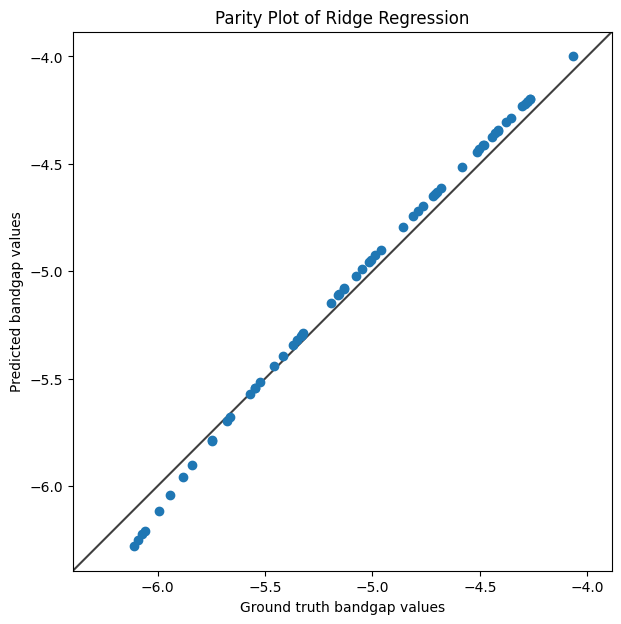

In [32]:
# 1.3.2.4
model = Ridge(alpha=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Ridge Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`
- Lasso regression is a method that avoid overfitting in the model by modifying the expression of mean square error calculation by introducing an additional term to the calculation. This additional term is $ \alpha * (|\sum(slopes)|) $. This ensures that unimportant features are eliminated

In [33]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
print("LASSO REGRESSION RMSEs\n")
print("alpha\t\tRMSE")
for alpha in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("{}\t{}".format(alpha,np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred))))

LASSO REGRESSION RMSEs

alpha		RMSE
1e-05	0.44189519197113886
0.0001	0.6124899982744757
0.001	0.17966732847322867
0.01	0.042419962550167355
0.1	0.4143688074221509
1	4.269928072334981
10	4.996771333559856


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`
- $ \alpha $ controls the magnitude of the penality applied to the model for selecting larger coefficients. A Higher value of $ \alpha $ results in lower chance of overfitting by reducing the complexity 
- With different values of $ \alpha $ we observe differing values of the RMSE. In this case, when $ \alpha = 0.01$ , we obtain the regression curve that offers the least error for the given set of $ \alpha $ values.

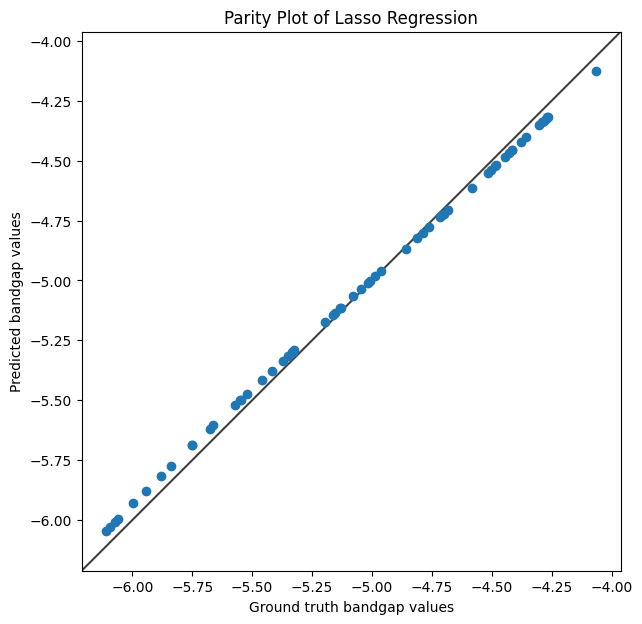

In [34]:
# 1.3.3.4
model = Lasso(alpha=0.01)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Lasso Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()